# <center> LAB 8 - Pancakes With A Problem! </center>
<center>Harold Alfredo Díaz Ortiz</center>

# Punto 3

Modify the&nbsp;<a href="https://github.com/gjhernandezp/algorithms/blob/master/PancakesTrees.ipynb">PancakesTrees.ipynb</a>&nbsp;code to plot the pancakes trees using two spatulas.

## Introducción

El punto final de este laboratorio consiste en la resolución del problema de ordenar los panqueques con 2 espátulas y formar los árboles para cada $P_n$ con $n \leq 5$ (un número lo suficientemente pequeño). Entendiendo que al haber dos espátulas la pila de panqueques tendra tres particiones, las modificaciones a los códigos de los puntos anteriores y a <a href="https://github.com/gjhernandezp/algorithms/blob/master/PancakesTrees.ipynb">PancakesTrees.ipynb</a> se enfocarán en este inciso, haciendo que una nueva pila sea la suma de tres particiones en vez de dos.

In [75]:
import pydot
from collections import defaultdict 
from IPython.display import Image, display

In [76]:
def lstr(p):
        return ''.join([str(elem) for elem in p])

Otra modificación importante es la vuelta de los árboles en lugar de las redes, siendo en este caso más fieles al código original y sólo modificándolo en lo que respecta a la pila de panqueques.

In [77]:
def ModifiedBFSfor2S(s): 
  #modified for plotting trees but two spatulas at a time
        graph = defaultdict()
        visited = defaultdict()
        G = pydot.Dot(graph_type="digraph")
        queue = [] 
        queue.append(s) 
        visited[lstr(s)] = True
  
        while queue: 
            s = queue.pop(0) 
            graph[lstr(s)]=[]
            flag = False
            for i in range(len(s)-1):
                d = s[i+1::-1] + s[i+2:]
                if (d == sorted(d)):
                     flag = True
            '''if flag:
              node = pydot.Node(lstr(s),style="filled", fillcolor="yellow")
            else: 
              node = pydot.Node(lstr(s))'''

            node = pydot.Node(lstr(s))
            G.add_node(node)
            
            if (s != sorted(s)):
              for i in range(len(s)-1):
                for j in range(i+1,len(s)):
                  #Se hace este cambio para representar las tres particiones de las espátulas
                  if i!=0:
                    d = s[:i] + s[j:i-1:-1] + s[j+1:]  
                  else:
                    d = s[j::-1] + s[j+1:]
                  
                  if (d != s) and not(lstr(d) in visited.keys()):
                    if (d != sorted(d)):
                      node = pydot.Node(lstr(d))
                    else:
                      node = pydot.Node(lstr(d),style="filled", fillcolor="green") # first sorted green
                    G.add_node(node)
                    edge = pydot.Edge(lstr(s),lstr(d))
                    G.add_edge(edge)
                    graph[lstr(s)].append(lstr(d))
                    queue.append(d) 
                    visited[lstr(d)] = True 
              
        im = Image(G.create_png())
        display(im)

La función generadora de todas las permutaciones para $n$ se mantiene indemne y será utilizada aquí también.

In [78]:
def all_outputs(n):
    s = list(range(n, 0, -1))
    s_list = []
    queue = []
    queue.append(s) 
    s_list.append(s)

    while queue:
        s = queue.pop(0) 
        if s != sorted(s):
            for i in range(len(s)-1):
                d = s[i+1::-1] + s[i+2:]
                if (d != s) and not(d in s_list):
                    queue.append(d)
                    s_list.append(d)
    return s_list

Con respecto a los dos primeros puntos, el cambio también se presenta en la partición con dos espátulas de la pila en lugar de la división con sólo una espátula vista anteriormente.

In [79]:
def ModifiedBFSPreSolsLevelFor2S(s,L):
        if s == sorted(s):
          return 0

        # Create dictionaries graph,visited and pydot graph G
        graph = defaultdict()
        visited = defaultdict()
        #G = pydot.Dot(graph_type="graph")
        
        # Create a queue for BFS 
        queue = [] 
  
        # Mark the source node as visited and enqueue it 
        queue.append([s,0]) 
        visited[lstr(s)] = True
        list_edges = [] ###
  
        while queue: 
            # Dequeue a vertex from queue 
            e = queue.pop(0)
            s = e[0]
            l = e[1] 
            graph[lstr(s)]=[]
            
            # Get all adjacent vertices of the 
            # dequeued vertex s. If a adjacent 
            # has not been visited, then mark it 
            # visited and enqueue it 
            if (s != sorted(s)) and (l < L):
              for i in range(len(s)-1):
                for j in range(i+1,len(s)):
                  if i!=0:
                    d = s[:i] + s[j:i-1:-1] + s[j+1:]  
                  else:
                    d = s[j::-1] + s[j+1:]
                  if (d != s) and not(lstr(d) in visited.keys()):
                  
                    if d == sorted(d):
                      return l+1
                    list_edges.append([lstr(s),lstr(d)]) ###
                    graph[lstr(s)].append(lstr(d))
                    queue.append([d,l+1]) 
                    visited[lstr(d)] = True
                  elif lstr(d) not in graph[lstr(s)]: ###
                    graph[lstr(s)].append(lstr(d)) ###
                    if ([lstr(s),lstr(d)] and [lstr(d),lstr(s)]) not in list_edges: ###
                      list_edges.append([lstr(s),lstr(d)])
        return -1

In [80]:
def get_pn(n, A):
  arr = None
  p_n = -1
  for i in range(0, len(A)):
    aux = [int(x) for x in A[i]]
    p_i = ModifiedBFSPreSolsLevelFor2S(aux, 5)
    if p_i > p_n:
      arr = A[i]
      p_n = p_i
  return arr, p_n

Los $P_n$ para todo $n \leq 5$ son los siguientes:

In [81]:
pn_list = []
for i in range(5):
  permutations = all_outputs(i+1)
  arr, p_n = get_pn(i+1, permutations)
  print("pn, n=", str(i+1), ": ", str(p_n), ". ", str(arr), sep="")
  pn_list.append([arr, p_n])

pn, n=1: 0. [1]
pn, n=2: 1. [2, 1]
pn, n=3: 2. [2, 3, 1]
pn, n=4: 3. [3, 1, 4, 2]
pn, n=5: 4. [2, 4, 1, 5, 3]


## Árboles

Las redes para cada $P_n$ obtenido son las siguientes:

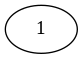

P1 = 0. [1]


In [82]:
i = 1
ModifiedBFSfor2S(pn_list[i-1][0])
print("P", i, " = ", pn_list[i-1][1], ". ", pn_list[i-1][0], sep="")

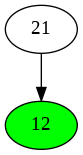

P2 = 1. [2, 1]


In [83]:
i = 2
ModifiedBFSfor2S(pn_list[i-1][0])
print("P", i, " = ", pn_list[i-1][1], ". ", pn_list[i-1][0], sep="")

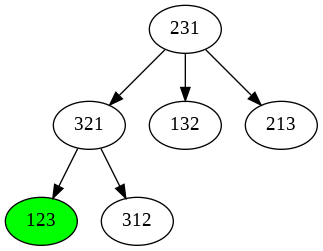

P3 = 2. [2, 3, 1]


In [84]:
i = 3
ModifiedBFSfor2S(pn_list[i-1][0])
print("P", i, " = ", pn_list[i-1][1], ". ", pn_list[i-1][0], sep="")

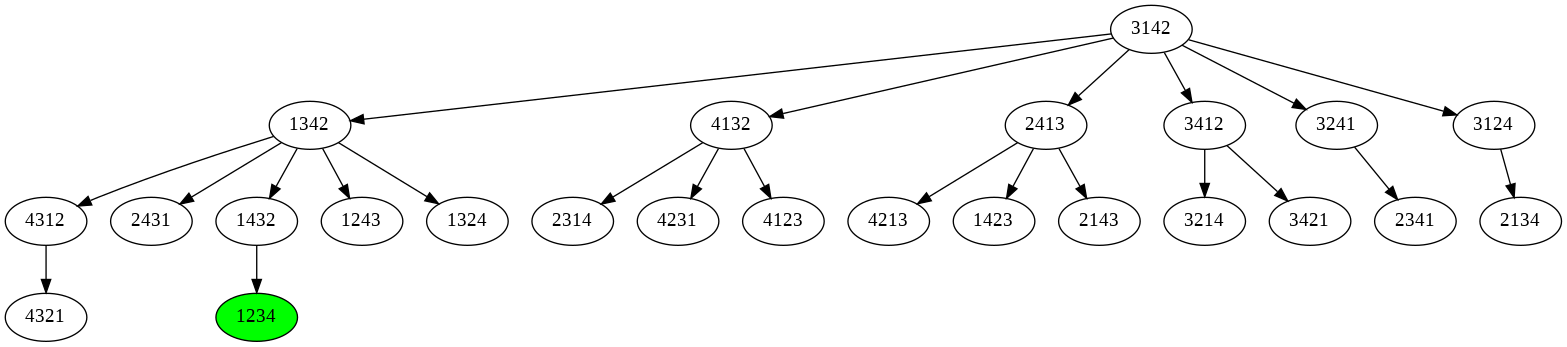

P4 = 3. [3, 1, 4, 2]


In [85]:
i = 4
ModifiedBFSfor2S(pn_list[i-1][0])
print("P", i, " = ", pn_list[i-1][1], ". ", pn_list[i-1][0], sep="")

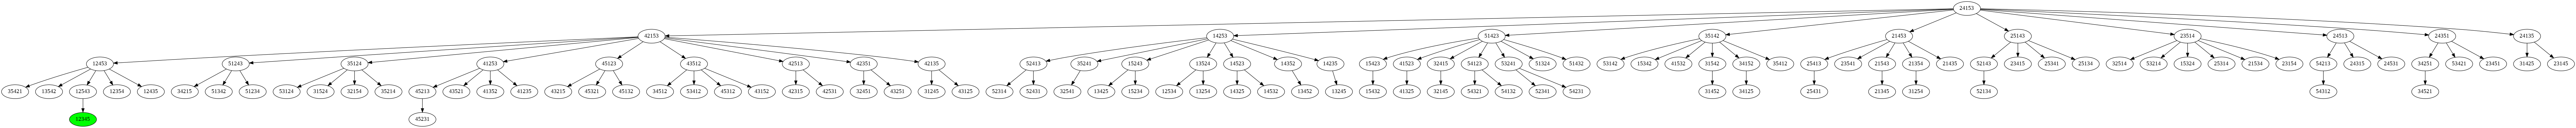

P5 = 4. [2, 4, 1, 5, 3]


In [86]:
i = 5
ModifiedBFSfor2S(pn_list[i-1][0])
print("P", i, " = ", pn_list[i-1][1], ". ", pn_list[i-1][0], sep="")

## References

- Breadth First Search or BFS for a Graph https://www.geeksforgeeks.org/breadth-first-search-or-bfs-for-a-graph/

- Graph visualization using Python https://www.youtube.com/watch?v=SpDI6-FvtJY

- nikhilkumarsingh
/
PyDot-Examples https://github.com/nikhilkumarsingh/PyDot-Examples/blob/master/Directory_Structure_Plotter.ipynb

- pydot https://pypi.org/project/pydot/

- Graphviz https://www.graphviz.org/

- NetworkX https://networkx.github.io/